In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import random
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

2023-11-05 21:11:18.232055: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
Ensamble2_preds = pd.read_csv("preds/Ensamble2_fullDataset.csv")
model2_preds =pd.read_csv("preds/model2.csv")
model2overfitter_preds =pd.read_csv("preds/model2_overfitter.csv")
EnsambleOfEnsambles_preds = pd.read_csv("preds/EnsambleOfEnsambles.csv")
test = pd.read_csv("test.csv")
test["Ensamble2"] = Ensamble2_preds["prediction"]
test["model2"] = model2_preds["prediction"]
test["model2OF"] = model2overfitter_preds["prediction"]
test["EnsambleOfEnsambles"] = EnsambleOfEnsambles_preds["prediction"]

display(test["Ensamble2"].mean())
display(test["model2"].mean())
display(test["model2OF"].mean())
display(test["EnsambleOfEnsambles"].mean())
location_a = test[test["location"].apply(lambda loc : loc == "A")]
location_b = test[test["location"].apply(lambda loc : loc == "B")]
location_c = test[test["location"].apply(lambda loc : loc == "C")]

548.9954610124412

577.8148448882866

580.1153852708569

579.7028211536841

<Axes: title={'center': 'C'}, xlabel='time'>

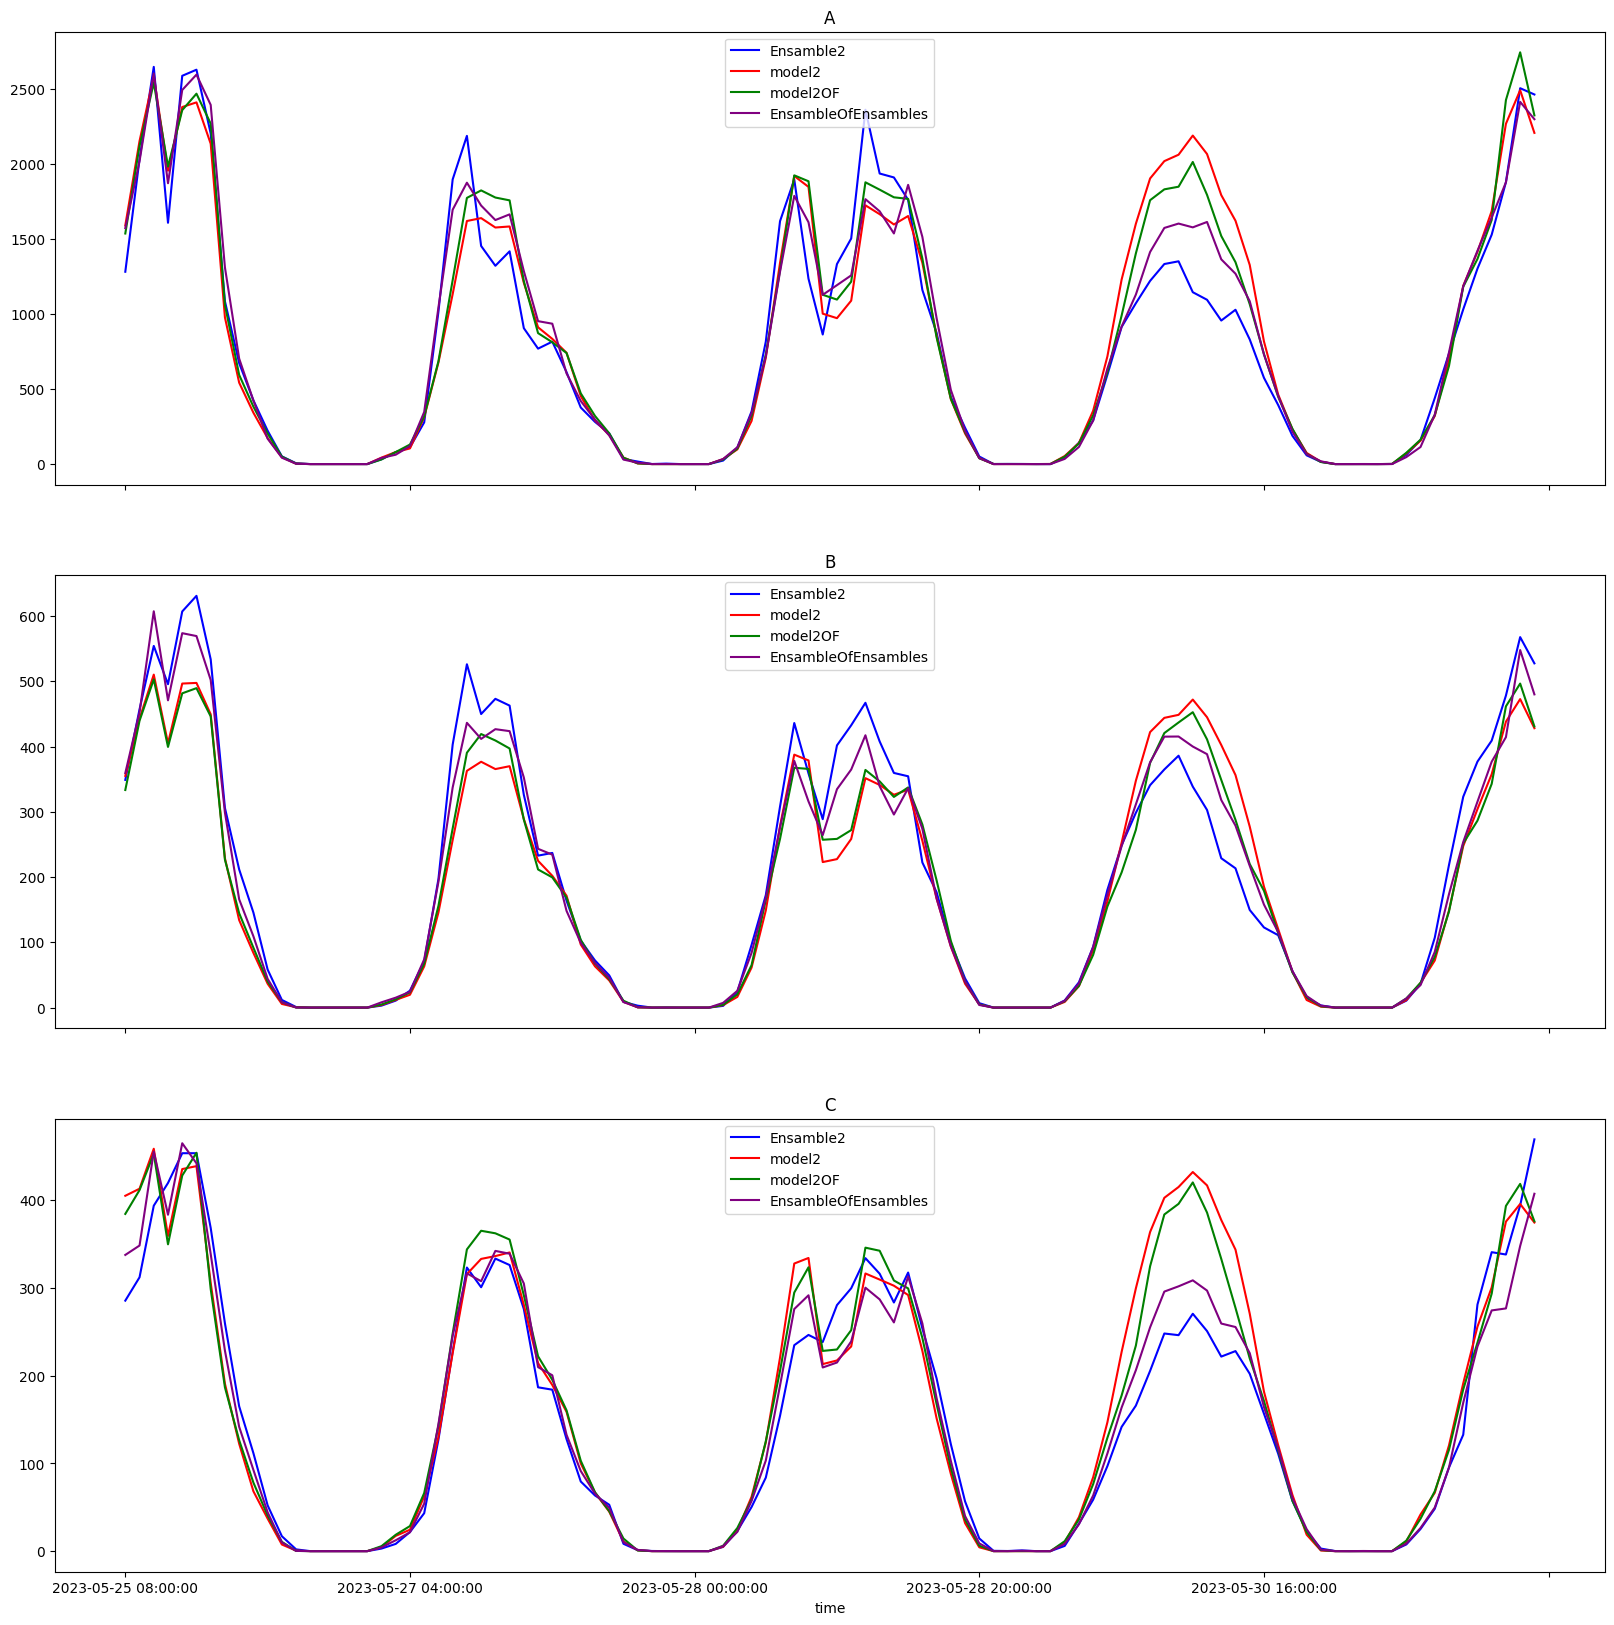

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(20, 20), sharex=True)
start_index = 200
time_step = 100
location_a.iloc[start_index:start_index+time_step][['time', 'Ensamble2']].set_index('time').plot(ax=axs[0], title='A', color='blue')
location_a.iloc[start_index:start_index+time_step][['time', "model2"]].set_index('time').plot(ax=axs[0], title='A', color='red')
location_a.iloc[start_index:start_index+time_step][['time', "model2OF"]].set_index('time').plot(ax=axs[0], title='A', color='green')
location_a.iloc[start_index:start_index+time_step][['time', "EnsambleOfEnsambles"]].set_index('time').plot(ax=axs[0], title='A', color='purple')

location_b.iloc[start_index:start_index+time_step][['time', 'Ensamble2']].set_index('time').plot(ax=axs[1], title='B', color='blue')
location_b.iloc[start_index:start_index+time_step][['time', "model2"]].set_index('time').plot(ax=axs[1], title='B', color='red')
location_b.iloc[start_index:start_index+time_step][['time', "model2OF"]].set_index('time').plot(ax=axs[1], title='B', color='green')
location_b.iloc[start_index:start_index+time_step][['time', "EnsambleOfEnsambles"]].set_index('time').plot(ax=axs[1], title='B', color='purple')

location_c.iloc[start_index:start_index+time_step][['time', 'Ensamble2']].set_index('time').plot(ax=axs[2], title='C', color='blue')
location_c.iloc[start_index:start_index+time_step][['time', "model2"]].set_index('time').plot(ax=axs[2], title='C', color='red')
location_c.iloc[start_index:start_index+time_step][['time', "model2OF"]].set_index('time').plot(ax=axs[2], title='C', color='green')
location_c.iloc[start_index:start_index+time_step][['time', "EnsambleOfEnsambles"]].set_index('time').plot(ax=axs[2], title='C', color='purple')